# Exploratory Data Analysis on the AirBnB data


### Importing of Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


from sklearn.utils import resample

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
air_data.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


# Extracting the response 

In [2]:
ratings = pd.DataFrame(air_data["review_scores_rating"])
ratings.shape

(4238, 1)

<AxesSubplot:>

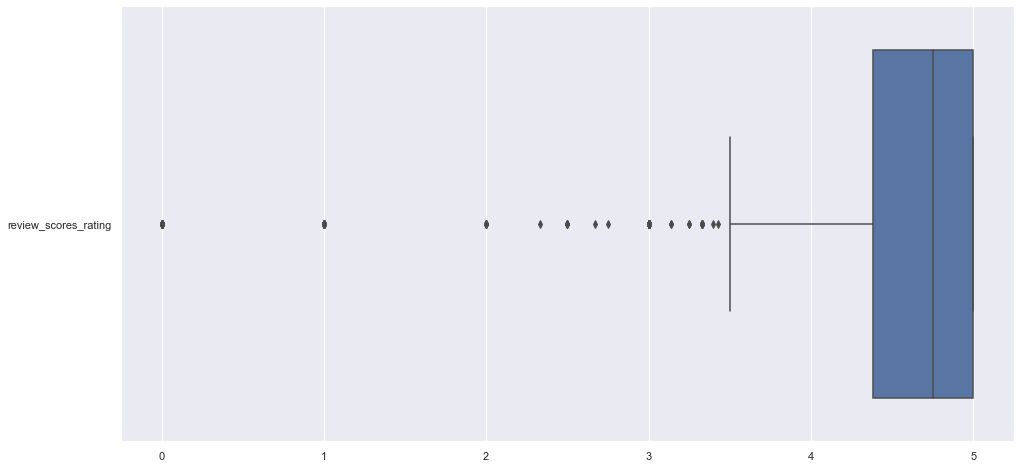

In [4]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = ratings, orient = "h")

In [5]:
ratings.isna().sum()

review_scores_rating    1759
dtype: int64

In [6]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4238 non-null   int64  
 1   listing_url                                   4238 non-null   object 
 2   scrape_id                                     4238 non-null   int64  
 3   last_scraped                                  4238 non-null   object 
 4   name                                          4238 non-null   object 
 5   description                                   4091 non-null   object 
 6   neighborhood_overview                         2791 non-null   object 
 7   picture_url                                   4238 non-null   object 
 8   host_id                                       4238 non-null   int64  
 9   host_url                                      4238 non-null   o

In [7]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')

air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
air_data["num_of_veri"].head()
#air_data = air_data.select_dtypes(exclude=['object'])
#air_data.info()

C:\Users\junwe\AppData\Local\Temp/ipykernel_11140/1916933017.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


0    9
1    8
2    9
3    5
4    5
Name: num_of_veri, dtype: int64

In [8]:
#f = plt.figure(figsize=(24, 24))
#sb.heatmap(air_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## All unique amenities in the top 100 rated AirBnB


In [9]:
top_air = air_data.sort_values(by=['review_scores_rating'],ascending = False )
top_air['rating_cleaned']=top_air['review_scores_rating'].round(1)
top_air = top_air[0:100]
top_air.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,num_of_veri,rating_cleaned
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,4.0,NaN,f,2,0,2,0,0.01,9,5.0
1842,29068591,https://www.airbnb.com/rooms/29068591,20210629180711,2021-06-29,6-Bed Private Room - Steps from Chinatown MRT!,We are ideally located next to Chinatown MRT S...,NaN,https://a0.muscache.com/pictures/172291aa-a010...,17526618,https://www.airbnb.com/users/show/17526618,...,5.0,NaN,f,13,0,3,0,0.04,3,5.0
1917,30180540,https://www.airbnb.com/rooms/30180540,20210629180711,2021-06-30,SG Family Room @ Haw Par Villa MRT,K2 Guesthouse is situated near NUS / NUH and B...,"Charming and comfortable, perfect for traveler...",https://a0.muscache.com/pictures/7f2572c4-e3cc...,18618387,https://www.airbnb.com/users/show/18618387,...,3.5,NaN,f,26,0,20,0,0.07,6,5.0
1912,30058572,https://www.airbnb.com/rooms/30058572,20210629180711,2021-06-29,prewar doublebed RmK* > lavender MRT.,"- Airconditioned Double-bed/Queen-size room, w...",- Apartment is within lavender neighbourhood (...,https://a0.muscache.com/pictures/df055bc1-c0f5...,97878860,https://www.airbnb.com/users/show/97878860,...,5.0,NaN,f,81,1,80,0,0.04,5,5.0
1911,30046453,https://www.airbnb.com/rooms/30046453,20210629180711,2021-06-29,Downtown *View Ensuite+livingRm (Non-Tourist),1. Private living room space with cable-TV and...,- Apartment is near Chinatown MRT exit C.<br /...,https://a0.muscache.com/pictures/27622692-33ca...,97878860,https://www.airbnb.com/users/show/97878860,...,5.0,NaN,f,81,1,80,0,0.03,5,5.0


In [10]:
top_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 2108
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            100 non-null    int64  
 1   listing_url                                   100 non-null    object 
 2   scrape_id                                     100 non-null    int64  
 3   last_scraped                                  100 non-null    object 
 4   name                                          100 non-null    object 
 5   description                                   98 non-null     object 
 6   neighborhood_overview                         78 non-null     object 
 7   picture_url                                   100 non-null    object 
 8   host_id                                       100 non-null    int64  
 9   host_url                                      100 non-null    ob

In [11]:
top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["amenities"] =top_air["amenities"].to_frame()
top_air["amenities"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_11140/3206109549.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')


0       Air conditioning, Elevator, Wifi, Long term st...
1842    Air conditioning, Lock on bedroom door, Wifi, ...
1917    Wifi, Carbon monoxide alarm, Washer, Dishes an...
1912    Pool, Cooking basics, Paid parking off premise...
1911    Elevator, Wifi, Cable TV, Washer, Dishes and s...
Name: amenities, dtype: object

In [12]:
top_amenities =  pd.DataFrame(''.join(top_air["amenities"]).lower().split(',')).value_counts()
top_amenities = top_air['amenities'].str.split(', ', expand=True).stack().value_counts()
top_amenities = top_amenities.rename_axis('amenities').reset_index(name='count')

<AxesSubplot:xlabel='count', ylabel='amenities'>

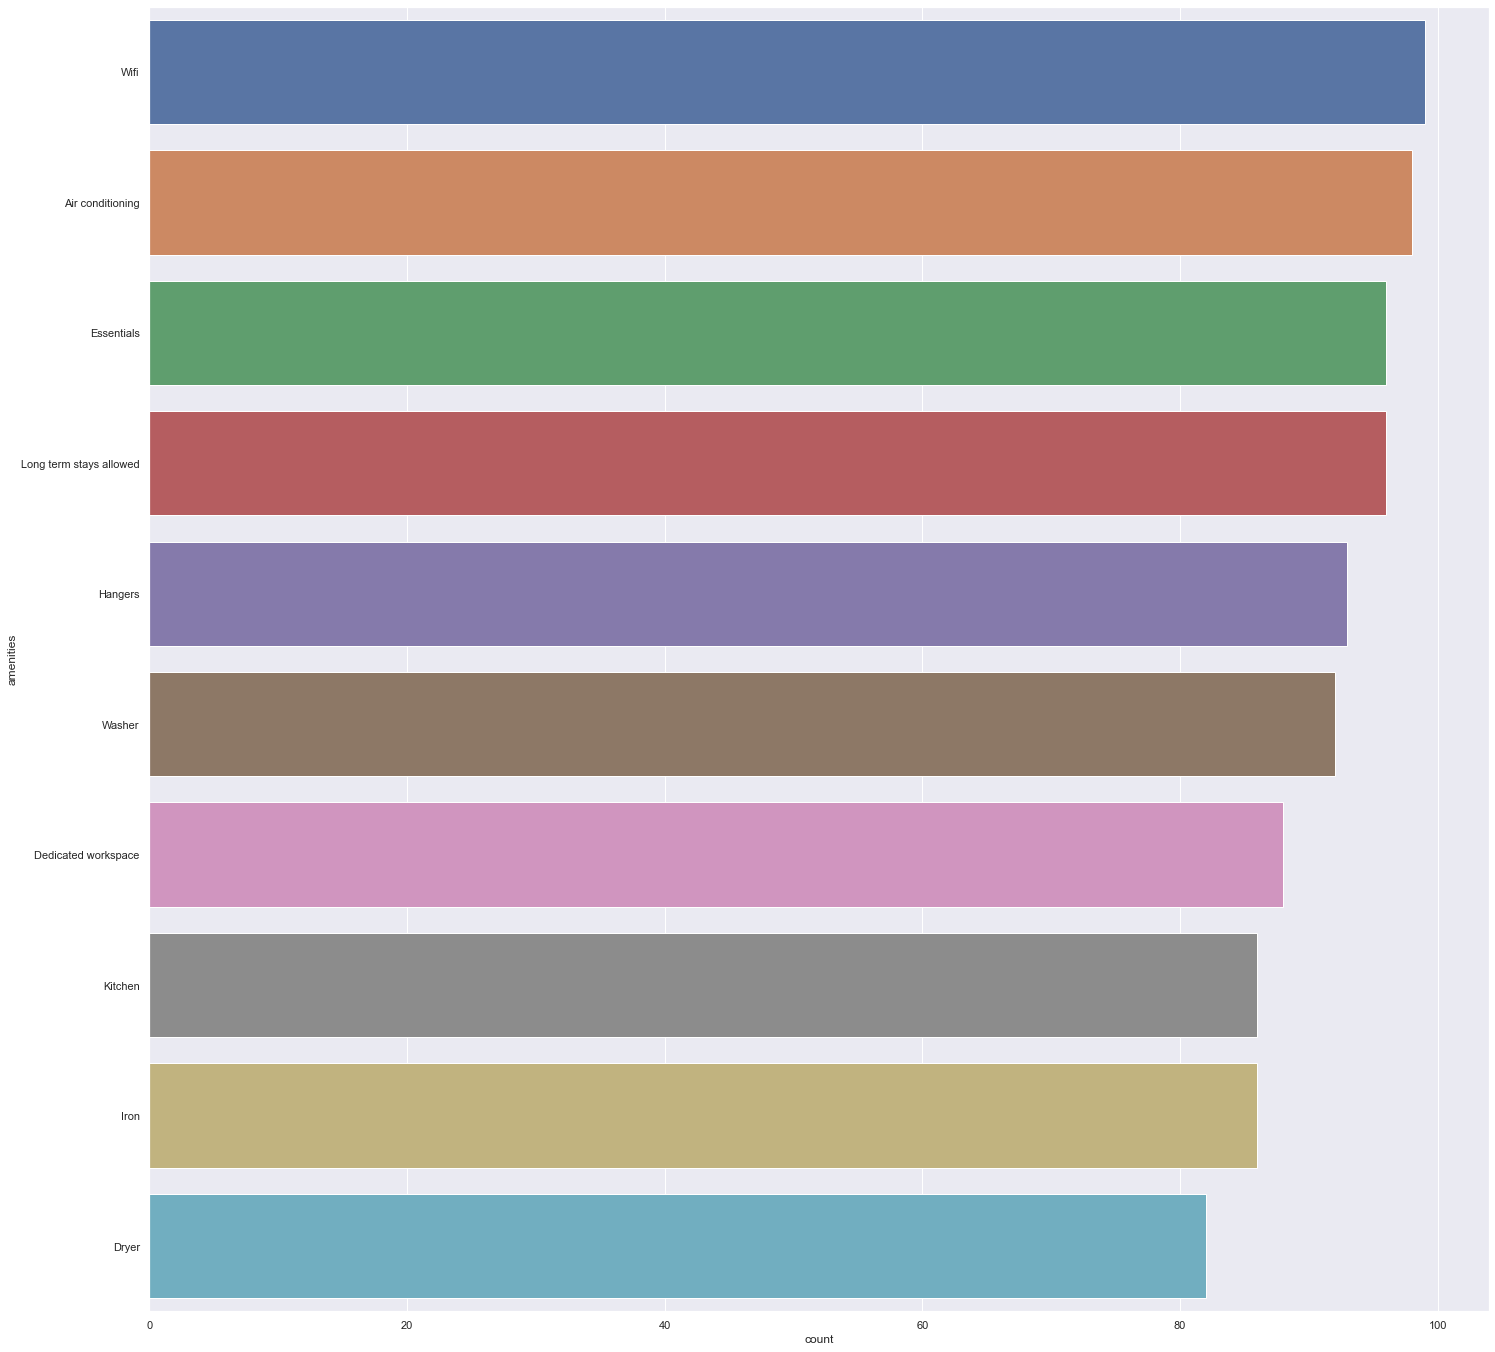

In [13]:
top_air["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
top_air["num_of_amenities"].head()
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="amenities", data=top_amenities[:10],orient = "h")

In [14]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(top_amenities)

                         amenities  count
0                             Wifi     99
1                 Air conditioning     98
2                       Essentials     96
3          Long term stays allowed     96
4                          Hangers     93
5                           Washer     92
6              Dedicated workspace     88
7                          Kitchen     86
8                             Iron     86
9                            Dryer     82
10                       Hot water     81
11           Dishes and silverware     70
12                    Refrigerator     70
13                           Stove     67
14                  Cooking basics     66
15                       Microwave     66
16                      Bed linens     65
17                Private entrance     64
18            Lock on bedroom door     64
19                         Heating     57
20                      Hair dryer     56
21         Luggage dropoff allowed     55
22                            Oven

# Property Type of the top Rated places|

<AxesSubplot:>

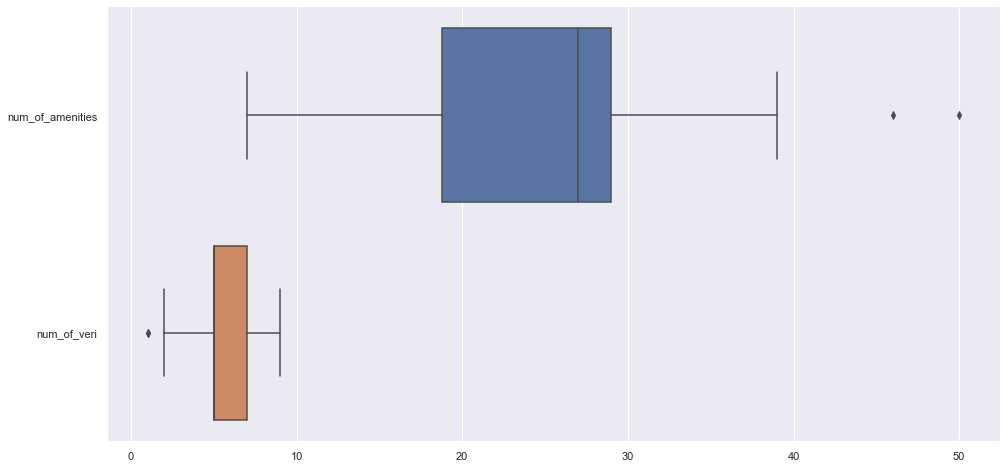

In [27]:
k=pd.DataFrame(top_air[["num_of_amenities","num_of_veri"]].dropna())
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = k, orient = "h")

In [16]:
top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["property_type"] =top_air["property_type"].to_frame()
top_air["property_type"].head()
top_air["property_type"].unique()


C:\Users\junwe\AppData\Local\Temp/ipykernel_11140/894769600.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')


array(['Private room in apartment', 'Private room in hostel',
       'Room in boutique hotel', 'Entire condominium',
       'Private room in condominium', 'Entire apartment',
       'Private room in house', 'Shared room in bed and breakfast',
       'Shared room in boutique hotel', 'Room in hotel',
       'Shared room in apartment', 'Entire house', 'Entire loft',
       'Entire serviced apartment'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='property_type'>

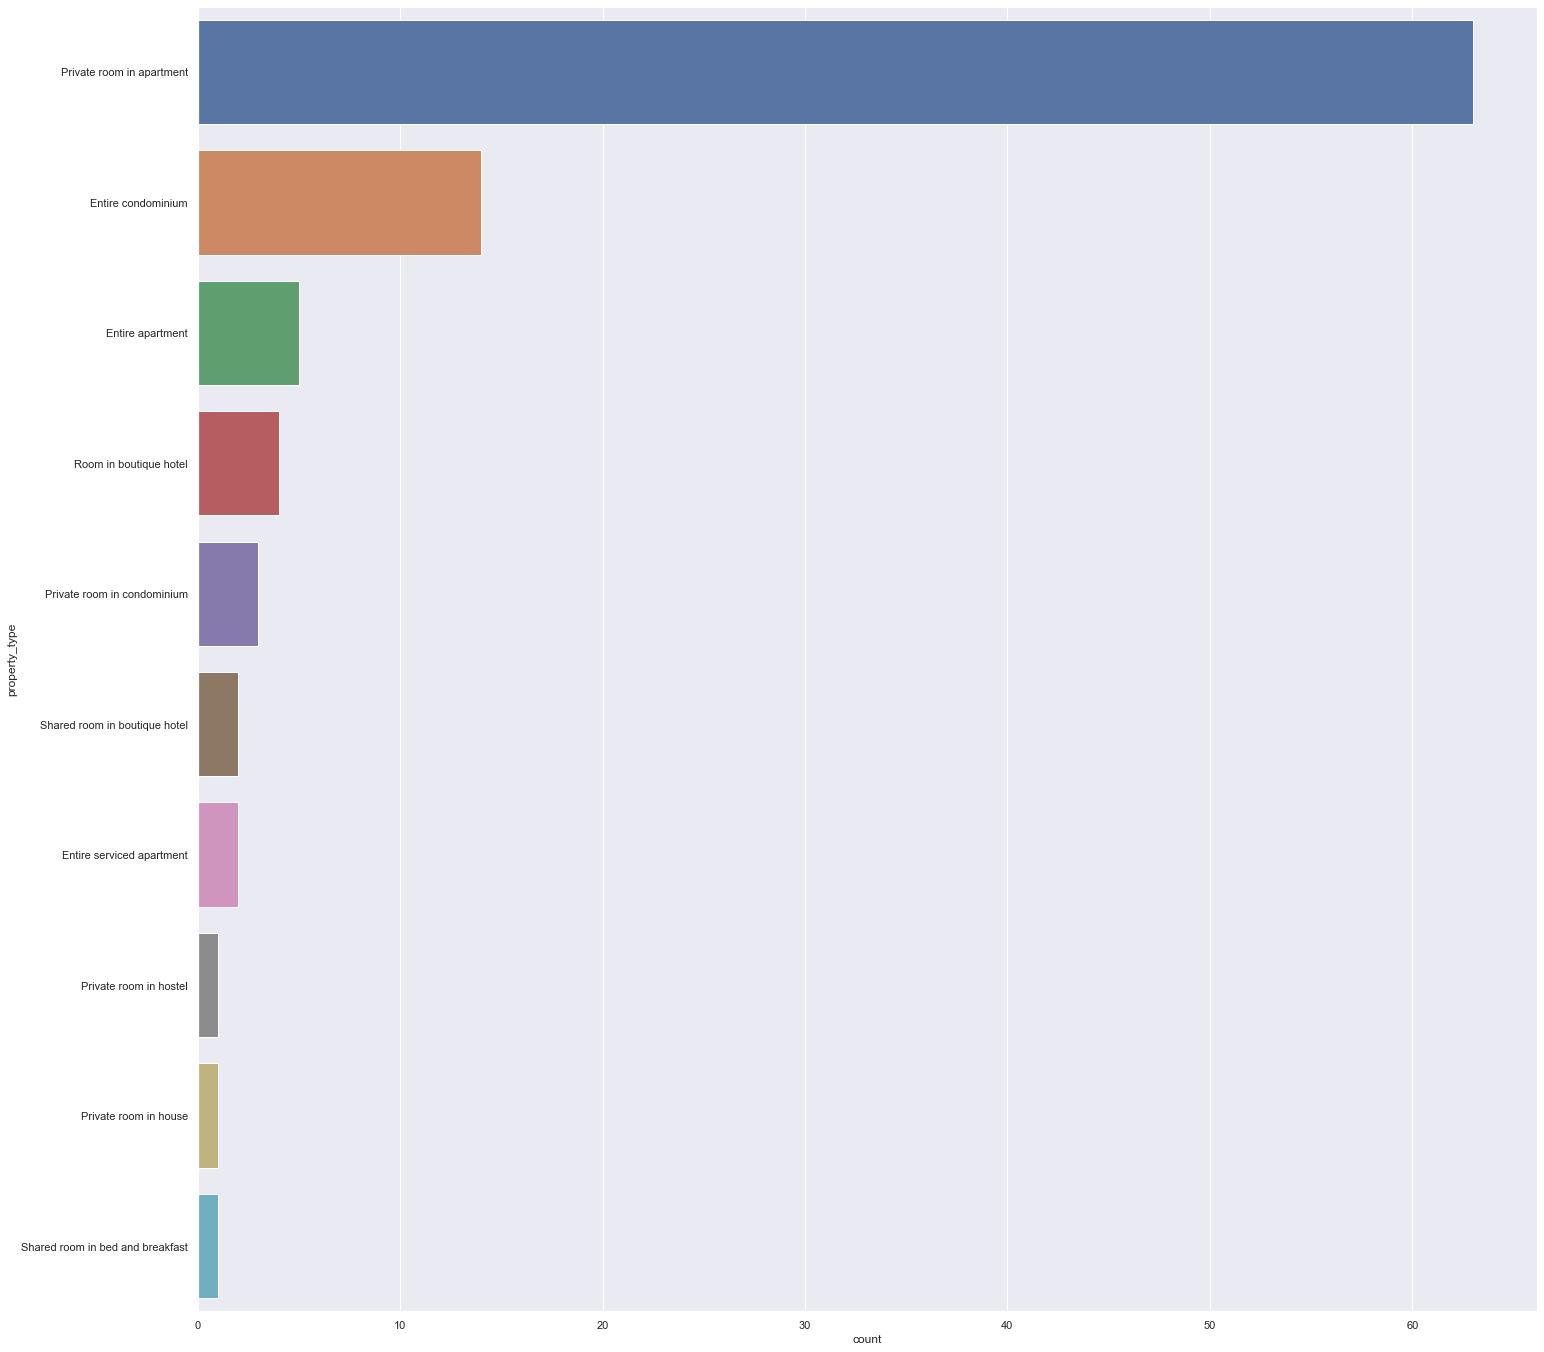

In [17]:
top_ptype = top_air['property_type'].str.split(', ', expand=True).stack().value_counts()
top_ptype = top_ptype.rename_axis('property_type').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="property_type", data=top_ptype[:10],orient = "h")

In [18]:
top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','')
top_air["neighbourhood_cleansed"] =top_air["neighbourhood_cleansed"].to_frame()
top_air["neighbourhood_cleansed"].head()

top_neig = top_air['neighbourhood_cleansed'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_neig = top_neig.rename_axis('neighbourhood_cleansed').reset_index(name='count')


C:\Users\junwe\AppData\Local\Temp/ipykernel_11140/40318175.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','')


<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

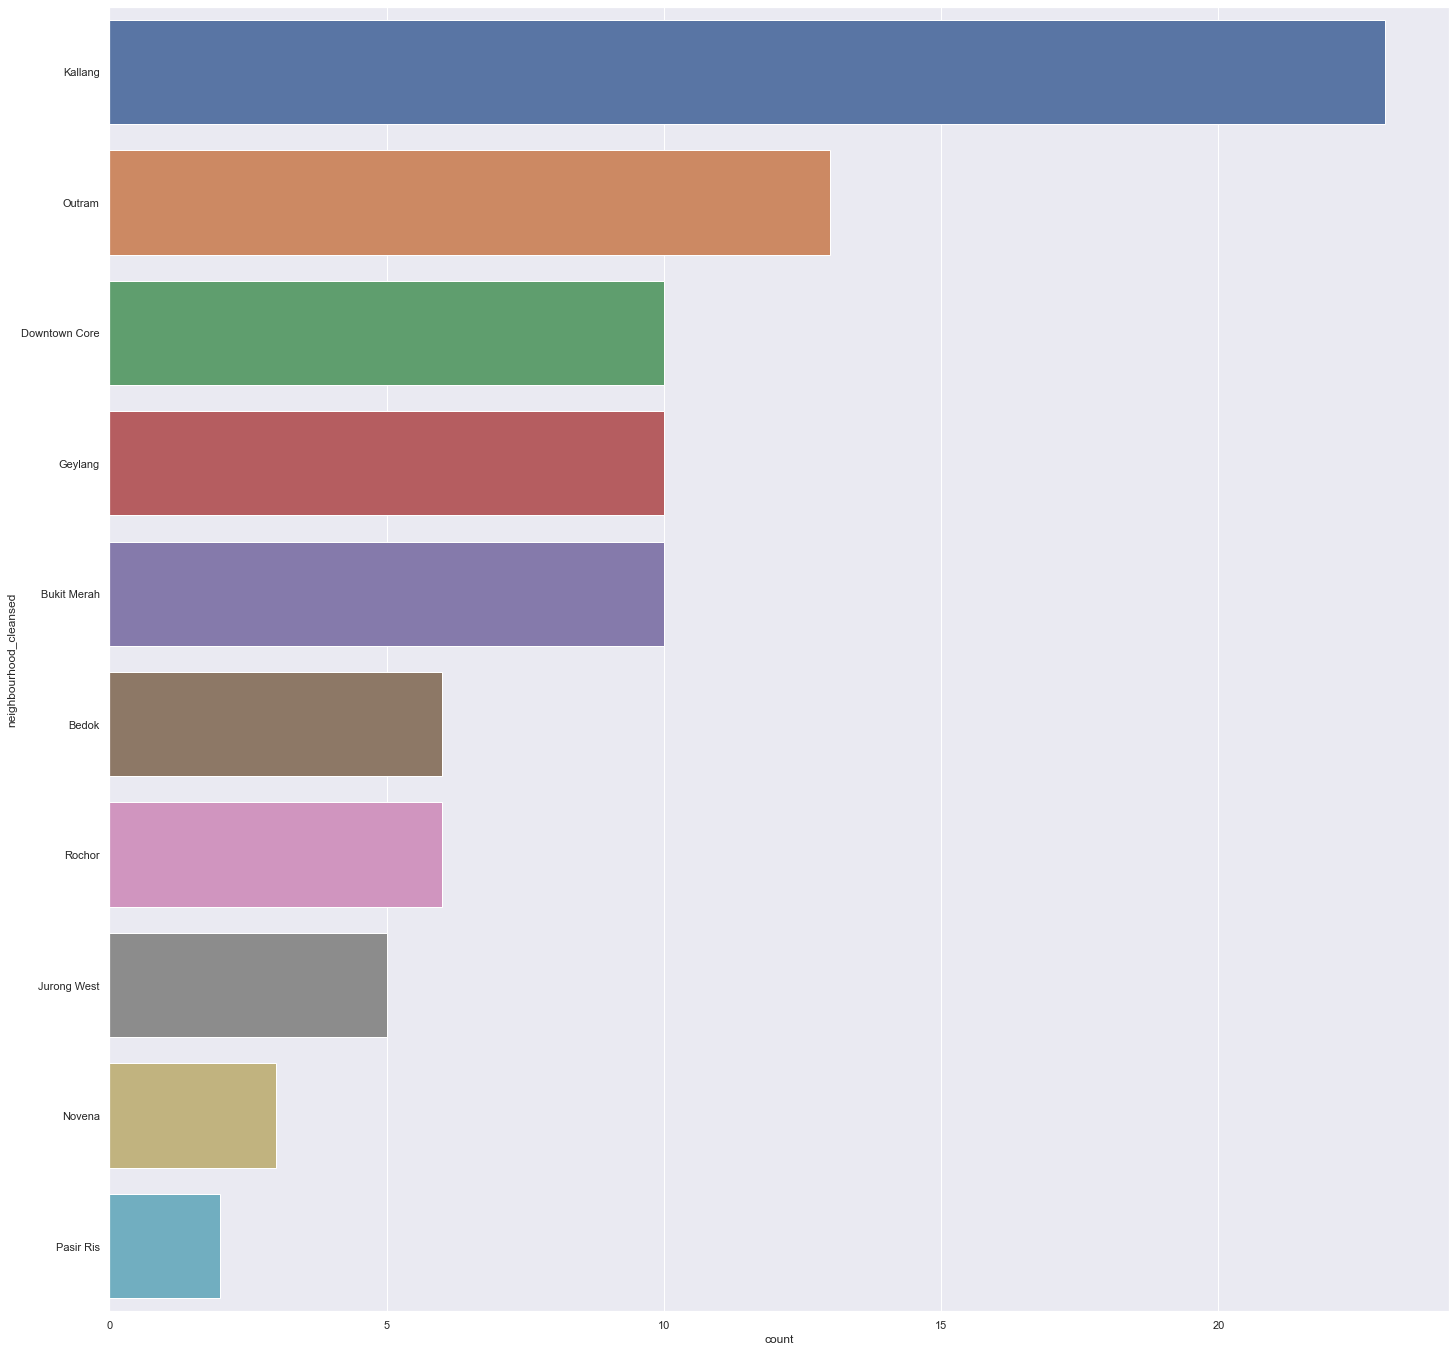

In [19]:
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="neighbourhood_cleansed", data=top_neig,orient = "h")

In [20]:
top_air["name"] = top_air["name"].str.replace(r'<[^<>]*>', ' ', regex=True)
#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
top_air["name"] = top_air["name"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(top_air["name"])
des["name"] = des["name"].str.replace('\d+', ' ', regex=True)
des.head()
top_words =  pd.DataFrame(' '.join(des["name"]).lower().split()).value_counts()
top_words = top_words.rename_axis('top_words').reset_index(name='count')

top_words.head()

,top_words,count
0,mrt,24
1,room,18
2,s,15
3,rm,14
4,br,13


In [21]:
print_full(top_words)

         top_words  count
0              mrt     24
1             room     18
2                s     15
3               rm     14
4               br     13
5             near     13
6         lavender     12
7               in     10
8        singlebed     10
9             city      9
10       chinatown      8
11            view      8
12         private      8
13         ensuite      8
14             apt      8
15              no      7
16        heritage      7
17       apartment      7
18              to      7
19           bahru      7
20             min      7
21         sharing      7
22           tiong      7
23             cbd      6
24          window      6
25           pagar      6
26         tourist      6
27            mins      6
28         orchard      5
29          center      5
30          master      5
31          single      5
32               a      5
33        aljunied      5
34            with      5
35            wifi      5
36            walk      5
37          

In [22]:
#conda install -c conda-forge wordcloud

In [23]:
from wordcloud import WordCloud



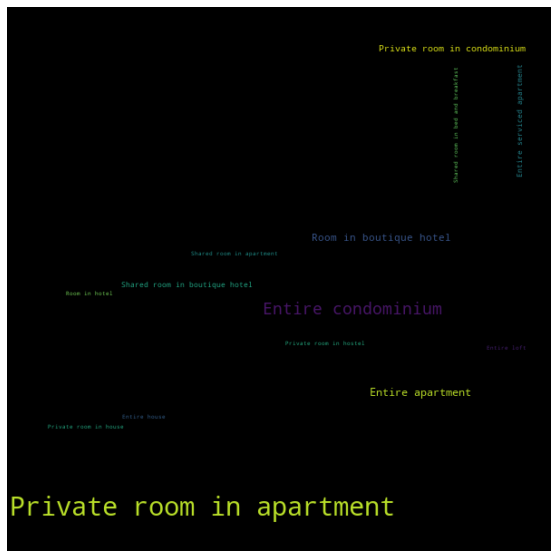

In [24]:

d = dict(zip(top_ptype['property_type'], top_ptype['count']))


wordcloud = WordCloud(background_color="black",width=600, height=600).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


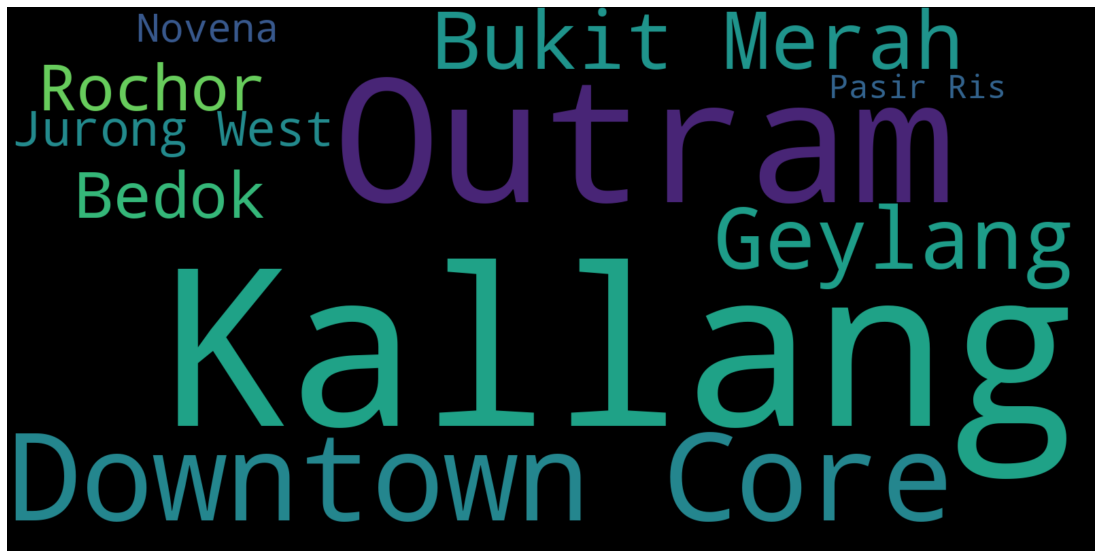

In [25]:
d = dict(zip(top_neig['neighbourhood_cleansed'], top_neig['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

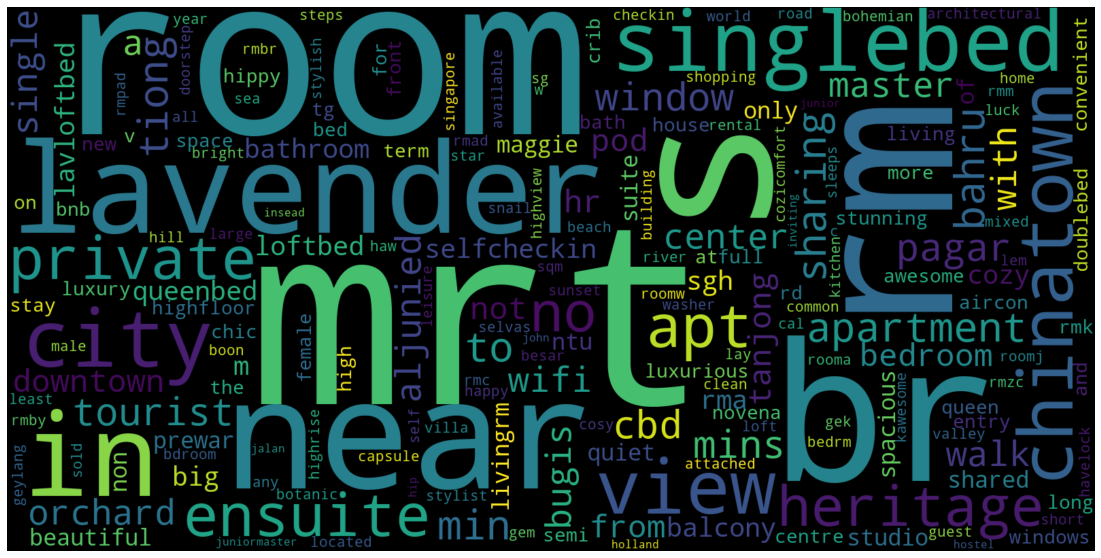

In [26]:
d = dict(zip(top_words['top_words'], top_words['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()